## 4.3 Работа с датасетом "house price"
4.1 Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
- Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('kc-house-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [46]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


<Axes: >

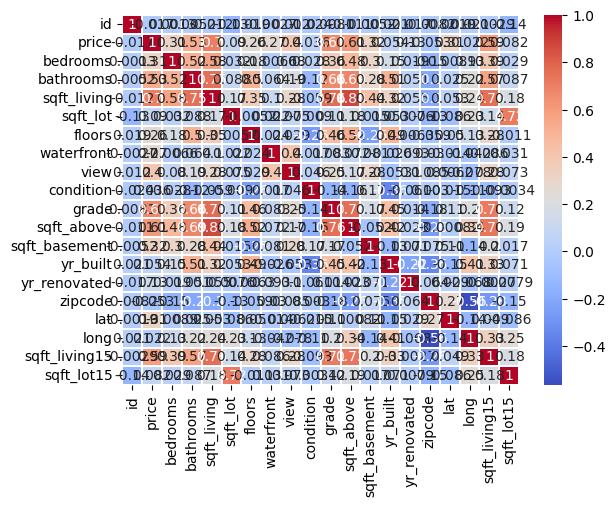

In [47]:
plt.figure()
sns.heatmap(corr_matrix, annot =True, linewidths=.10, cmap='coolwarm')

In [49]:
df_corr = df[['price','sqft_living','bathrooms', 'sqft_above', 'grade','view','condition', 'waterfront','lat','sqft_living15', 'sqft_lot15']]
df_corr

,price,sqft_living,bathrooms,sqft_above,grade,view,condition,waterfront,lat,sqft_living15,sqft_lot15
0,221900.0,1180,1.00,1180,7,0,3,0,47.5112,1340,5650
1,538000.0,2570,2.25,2170,7,0,3,0,47.7210,1690,7639
2,180000.0,770,1.00,770,6,0,3,0,47.7379,2720,8062
3,604000.0,1960,3.00,1050,7,0,5,0,47.5208,1360,5000
4,510000.0,1680,2.00,1680,8,0,3,0,47.6168,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,1530,2.50,1530,8,0,3,0,47.6993,1530,1509
21609,400000.0,2310,2.50,2310,8,0,3,0,47.5107,1830,7200
21610,402101.0,1020,0.75,1020,7,0,3,0,47.5944,1020,2007
21611,400000.0,1600,2.50,1600,8,0,3,0,47.5345,1410,1287


In [50]:
corr_matrix = df_corr.corr()

<Axes: >

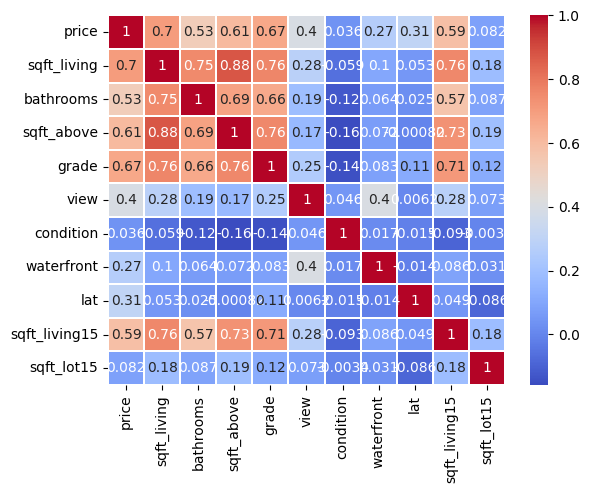

In [51]:
plt.figure()
sns.heatmap(corr_matrix, annot =True, linewidths=.10, cmap='coolwarm')

Из анализа корреляционных связей прежде всего видно, что на стоимость дома практически не влияет такая, казалось бы, важная характеристика как состояние дома (0,036), незначительно влияют: вид на набережную (0,27), внешний вид (0,4), географическое расположение (0,31). Наибольшее влияние оказывают, в порядке убывания: жилая площадь (0,7), конструкция здания и дизайн (0,67), надземная площадь здания(0,61,), жилая площадь ближайших соседей (0,59) и количество ванных комнат(0,53).
Рассмотрим последние связи более подробно.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

1. жилая площадь (0,7)

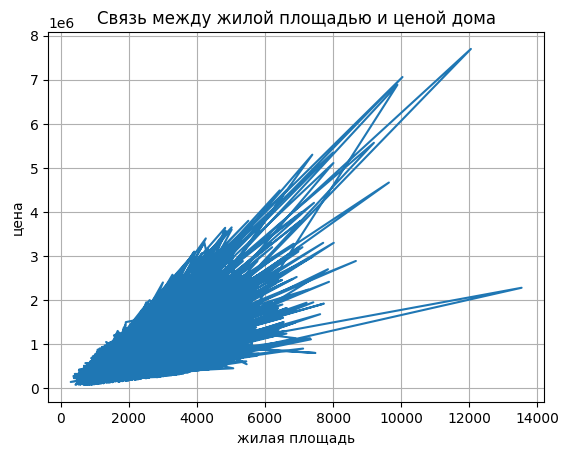

In [58]:
plt.figure()
plt.plot(df_corr['sqft_living'], df_corr['price'])
plt.title('Связь между жилой площадью и ценой дома')
plt.xlabel('жилая площадь')
plt.ylabel('цена');
plt.grid()

Из графика видно, что прямая зависимость есть, но в очень широких пределах. Цена дома в 10 000кв.ф может варьировать от 1,8 у.е. до 7 у.е.

2. конструкция здания и дизайн (0,67)

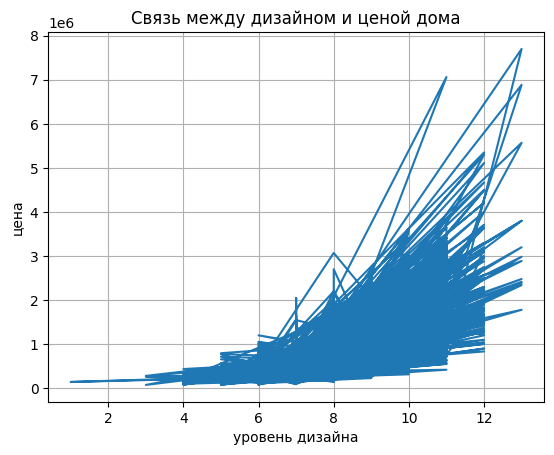

In [62]:
plt.figure()
plt.plot(df_corr['grade'], df_corr['price'])
plt.title('Связь между дизайном и ценой дома')
plt.xlabel('уровень дизайна')
plt.ylabel('цена')
plt.grid();

Зависимость от уровня дизайна также очень сильно варьируется: у наиболее дешевых домов дизайн практически не влияет на цену. Но с ростом цены качество дизайна приобретает все большее значение и зависимость имеет скорее экспоненциальный характер.

3. надземная площадь здания(0,61,)

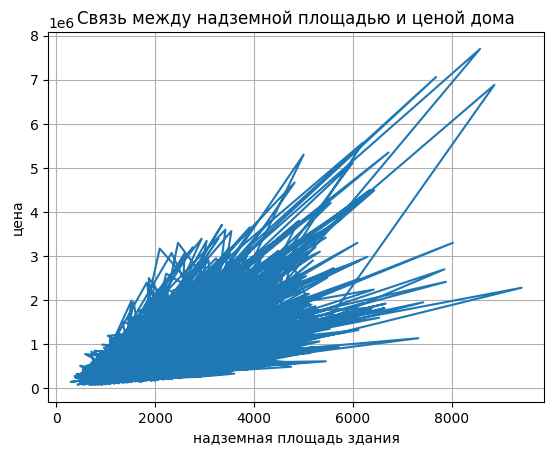

In [61]:
plt.figure()
plt.plot(df_corr['sqft_above'], df_corr['price'])
plt.title('Связь между надземной площадью и ценой дома')
plt.xlabel('надземная площадь здания')
plt.ylabel('цена')
plt.grid();

Из графика видно, что прямая зависимость, как и в случае с жилой площадью есть, но в очень широких пределах. Цена дома с надземной площадью 8 000кв.ф может варьировать от 2 у.е. до 7 у.е.

4. жилая площадь ближайших 15 соседей (0,59)

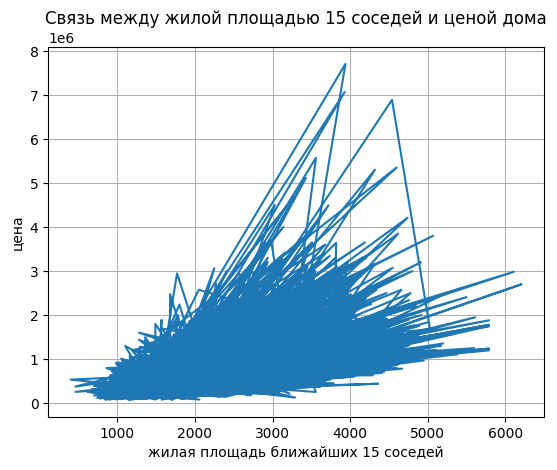

In [63]:
plt.figure()
plt.plot(df_corr['sqft_living15'], df_corr['price'])
plt.title('Связь между жилой площадью 15 соседей и ценой дома')
plt.xlabel('жилая площадь ближайших 15 соседей')
plt.ylabel('цена')
plt.grid();

Из графика видно, что размеры жилой площади соседей  оказывают влияние на цену дома. Зависимость прямая, как и в случае с жилой площадью, но в очень широких пределах. 

5. количество ванных комнат(0,53)

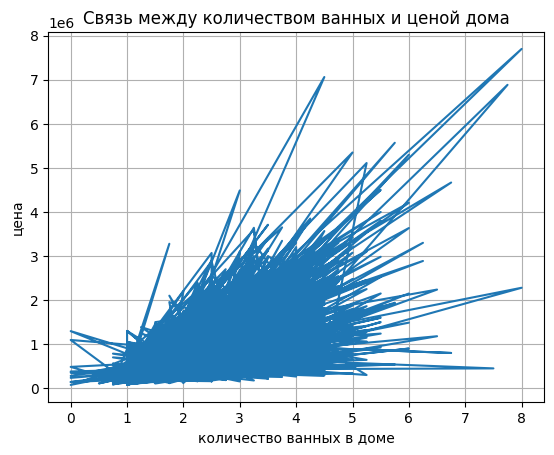

In [64]:
plt.figure()
plt.plot(df_corr['bathrooms'], df_corr['price'])
plt.title('Связь между количеством ванных и ценой дома')
plt.xlabel('количество ванных в доме')
plt.ylabel('цена')
plt.grid();

Из графика видно, что количество ванных комнат  оказываент влияние на цену дома. Зависимость прямая, как и в случае с жилой площадью, но в очень широких пределах. 

Общий вывод: для более тщательного анализа необходимо делить дома на несколько фрагментов по стоимости и для каждой ценовой группы проводить отдельный анализ.